# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Elin Betsey Br Ginting
- **Email:** elinbetsey505@gmail.com
- **ID Dicoding:** elin_betsey

## Menentukan Pertanyaan Bisnis

- Pada musim apa sepeda paling banyak dan paling sedikit disewa?
- Bagaimana performa lama sepeda disewa setiap bulannya pada setiap tahun?

## Import Semua Packages/Library yang Digunakan

Langkah 1:

Import Packages dan Library yang akan digunakan untuk pengolahan data dan visualisasi data

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

## Data Wrangling

### Gathering Data

Bike Sharing Dataset memiliki dua tabel, yaitu tabel day dan tabel hour. Pertama-tama muat tabel day dan hour. Import data terlebih dahulu kedalam Google Colab.

Memuat table day:

In [141]:
day_df = pd.read_csv("/content/day.csv")
day_df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Memuat table hour

In [142]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

Selanjutnya tipe data dari setiap kolom pada tabel day di periksa. Hal ini untuk mengecek apakah ada missing value dan ketepatan tipe data untuk setiap kolomnya.

In [143]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada info diatas dapat dilihat bahwa tidak terdapat missing values pada tabel day. Data type pada kolom dteday adalah object, data type ini kurang cocok dan akan diganti nanti pada cleaning.

Selanjutnya data harus diperiksa apakah terdapat duplikasi data atau tidak.

In [144]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang terduplikasi pada tabel day.

Memeriksa parameter statistik dari kolom numerik yang terdapat dalam tabel day

In [145]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


 Tidak ada keanehan pada hasil diatas.

Selanjutnya tipe data dari setiap kolom pada tabel hour di periksa. Hal ini untuk mengecek apakah ada missing value dan ketepatan tipe data untuk setiap kolomnya.

In [146]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada info diatas dapat dilihat bahwa tidak terdapat missing values pada tabel hour. Data type pada kolom dteday adalah object, data type ini kurang cocok dan akan diganti nanti pada cleaning.

Selanjutnya data harus diperiksa apakah terdapat duplikasi data atau tidak.

In [147]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat data yang terduplikasi pada tabel hour dan  tidak ada keanehan pada hasil diatas.

Hingga tahap ini telah diidentifikasi dua masalah pada data yang telah dikumpulkan, yaitu:
1. Data type kolom dteday pada tabel day adalah object, data type ini kurang cocok dan akan diganti dengan data type datetime.
2.  Data type kolom dteday pada tabel hour adalah object, data type ini kurang cocok dan akan diganti dengan data type category.

### Cleaning Data

Membersihkan data day_df dengan mengubah tipe data kolom dteday

In [148]:
datetime_column = ["dteday"]

for column in datetime_column:
  day_df[column] = pd.to_datetime(day_df[column])

Mengecek kembali apakah tipe data pada dteday dalam tabel day telah berubah menjadi datetime.

In [149]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Data type pada dteday sudah berubah dari yang semula object menjadi datetime.

Membersihkan data hour_df dengan mengubah tipe data kolom dteday

In [150]:
hour_df['dteday'] = hour_df['dteday'].astype('category')


Mengecek kembali apakah tipe data pada dteday dalam tabel day telah berubah menjadi category.

In [151]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  category
 2   season      17379 non-null  int64   
 3   yr          17379 non-null  int64   
 4   mnth        17379 non-null  int64   
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  int64   
 7   weekday     17379 non-null  int64   
 8   workingday  17379 non-null  int64   
 9   weathersit  17379 non-null  int64   
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(1), float64(4), int64(12)
memory usage: 2.2 MB


Data type pada dteday sudah berubah dari yang semula object menjadi category.

## Exploratory Data Analysis (EDA)

### Explore ...

Merangkum parameter statistik dari data day_df

In [152]:
day_df.describe(include="all")

<ipython-input-152-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Selanjutnya, berdasarkan season, ambil jumlah pelanggan casual, registered, dan jumlah pelanggan casual + registered. Sebelumnya, ambil nilai season terlebih dahulu.

In [153]:
pd.unique(day_df['season'])

array([1, 2, 3, 4])

Dapat diketahui terdapat 4 kategori season yang ada pada day_df. Selanjutnya buat pivot table dengan kolom season, casual, registered, dan cnt.

In [154]:
season_analysis = day_df.iloc[:,[2,13,14,15]]
season_analysis

,season,casual,registered,cnt
0,1,331,654,985
1,1,131,670,801
2,1,120,1229,1349
3,1,108,1454,1562
4,1,82,1518,1600
...,...,...,...,...
726,1,247,1867,2114
727,1,644,2451,3095
728,1,159,1182,1341
729,1,364,1432,1796


In [155]:
season_analysis.groupby('season').sum()

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


Pivot table diatas menunjukkan bahwa season '3' adalah season dimana sepeda paling banyak disewa dan season '1' adalah season dimana sepeda paling sedikit disewa.

Merangkum parameter statistik dari data day_df

In [156]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Menghitung lama penyewaan sepeda per tahun dalam satuan jam. Pertama cari nilai unique dari kolom yr dan mnth

In [157]:
pd.unique(hour_df['yr'])

array([0, 1])

In [158]:
pd.unique(hour_df['mnth'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Menghitung total jam sewa dengan mengalikan kolom hr dan cnt dan disimpan pada kolom baru.

In [159]:
hour_df['total hours']= hour_df["hr"] * hour_df["cnt"]
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total hours
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,64
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,39
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,5
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,12
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,21
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,64
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,126


Membuat pivot tabel dengan kolom year, hour, cnt, dan

In [160]:
hours_analysis = hour_df.iloc[:,[3,4,5,16,17]]
hours_analysis

,yr,mnth,hr,cnt,total hours
0,0,1,0,16,0
1,0,1,1,40,40
2,0,1,2,32,64
3,0,1,3,13,39
4,0,1,4,1,4
...,...,...,...,...,...
17374,1,12,19,119,2261
17375,1,12,20,89,1780
17376,1,12,21,90,1890
17377,1,12,22,61,1342


In [161]:
hours_analysis.groupby(['yr', 'mnth']).sum()

hr     cnt  total hours
yr mnth                           
0  1     8168   38189       533692
   2     7649   48215       677933
   3     8506   64045       899059
   4     8277   94870      1357117
   5     8556  135821      1943527
   6     8280  143512      2066434
   7     8556  141341      2029199
   8     8412  136691      1957703
   9     8274  127418      1816303
   10    8553  123511      1745253
   11    8278  102167      1417585
   12    8545   87323      1198907
1  1     8547   96744      1352011
   2     7990  103137      1438852
   3     8554  164875      2342724
   4     8273  174224      2473708
   5     8556  195865      2794022
   6     8280  202830      2894688
   7     8556  203607      2910434
   8     8556  214503      3067276
   9     8280  218573      3087115
   10    8202  198841      2793786
   11    8274  152664      2108547
   12    8549  123713      1702766

Dari pivot table diatas dapat dilihat performa lama sewa sepeda selama 2 tahun terakhir perbulannya. Selanjutnya, untuk mengetahui apakah ada peningkatan performa berdasarkan lama sepeda disewa antara tahun pertama dan tahun kedua, dibuat pivot table berdasarkan tahun.

In [162]:
hours_analysis.groupby('yr').sum()

,mnth,hr,cnt,total hours
yr,,,,
0,56832,100054,1243103,17642712
1,56788,100617,2049576,28965929


Dari pivot table diatas dapat dilihat bahwa ada peningkatan performa dari tahun pertama ke tahun kedua.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa sepeda paling banyak dan paling sedikit disewa?

Pada hasil Exploratory Data Analysis yang sudah dilakukan dapat diketahui bahwa season '3' merupakan musim dimana sepeda paling banyak disewa dan season '1' merupakan musim dimana sepeda paling sedikit disewa. Tetapi untuk visualisasi data, angka kategori 1-4 diganti untuk memudahkan penyampaian data melalui visualisasi nanti.

In [163]:
season_name = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}

In [164]:
season_analysis['season'] = season_analysis['season'].replace(season_name)
print(season_analysis)

       season  casual  registered   cnt
0    springer     331         654   985
1    springer     131         670   801
2    springer     120        1229  1349
3    springer     108        1454  1562
4    springer      82        1518  1600
..        ...     ...         ...   ...
726  springer     247        1867  2114
727  springer     644        2451  3095
728  springer     159        1182  1341
729  springer     364        1432  1796
730  springer     439        2290  2729

[731 rows x 4 columns]


<ipython-input-164-d186aa8c4ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_analysis['season'] = season_analysis['season'].replace(season_name)


In [165]:
season_analysis.groupby('season').sum()

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
springer,60622,410726,471348
summer,203522,715067,918589
winter,129782,711831,841613


Menampilkan hasil dalam bentuk diagram.

In [166]:
season_analysis_diagram = season_analysis.groupby('season').sum()

Text(0.5, 1.0, 'Total Sepeda yang Disewa per Musim')

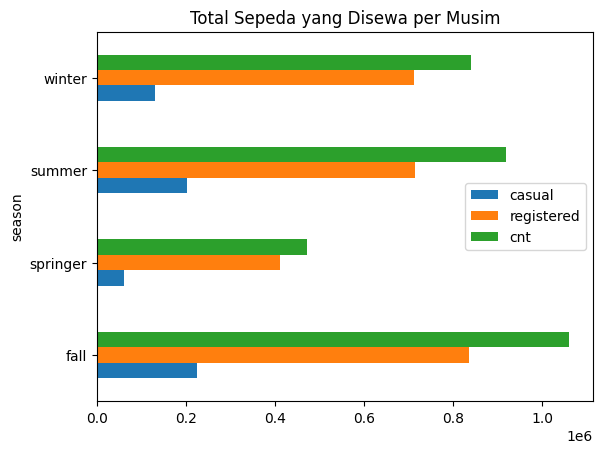

In [167]:
season_analysis_diagram.plot.barh()
plt.title('Total Sepeda yang Disewa per Musim')

Agar lebih mudah dibaca, nilai diurutkan berdasarkan jumlah sepeda disewa terbanyak.

Text(0.5, 1.0, 'Total Sepeda yang Disewa per Musim')

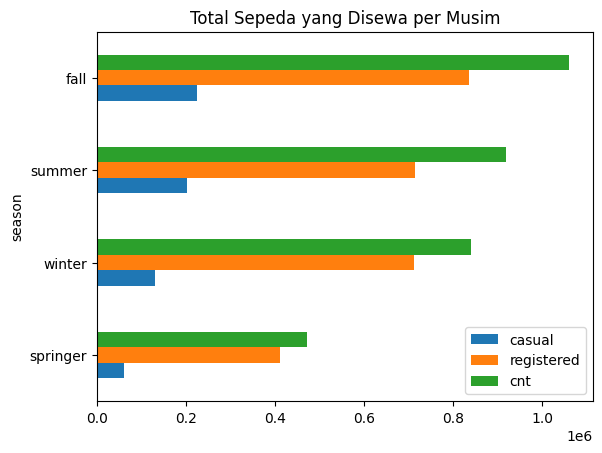

In [168]:
season_analysis_diagram.sort_values(by='cnt', inplace=True)
season_analysis_diagram.plot.barh()
plt.title('Total Sepeda yang Disewa per Musim')

Melakukan Teknik Analisis Deret Waktu dengan Model Seasonal Decomposition of Time Series (STL) untuk mengidentifikasi pola dan fluktuasi dalam data.

Langkah-Langkah:


1.   Siapkan data dalam bentuk DataFrame atau bentuk data time series yang sesuai.
2.   Dengan menggunakan library statsmodels untuk menggunakan metode STL.
3.   Fit model STL ke data time series Anda.
4.   Akan didapat komponen-komponen utama dari hasil STL, yaitu trend, seasonal, dan residual.

STL digunakan untuk menganalisis hasil komponen untuk memahami tren jangka panjang, pola musiman, dan sisa-sisa dari data.



In [169]:
data_stl = pd.read_csv('/content/day.csv', parse_dates=['dteday'], index_col= 'dteday')

time_series_data = data_stl['cnt']

decomposition = STL(time_series_data, seasonal=31).fit()
trend, seasonal, residual = decomposition.trend, decomposition.seasonal, decomposition.resid

Visualisasi komponen-komponen STL

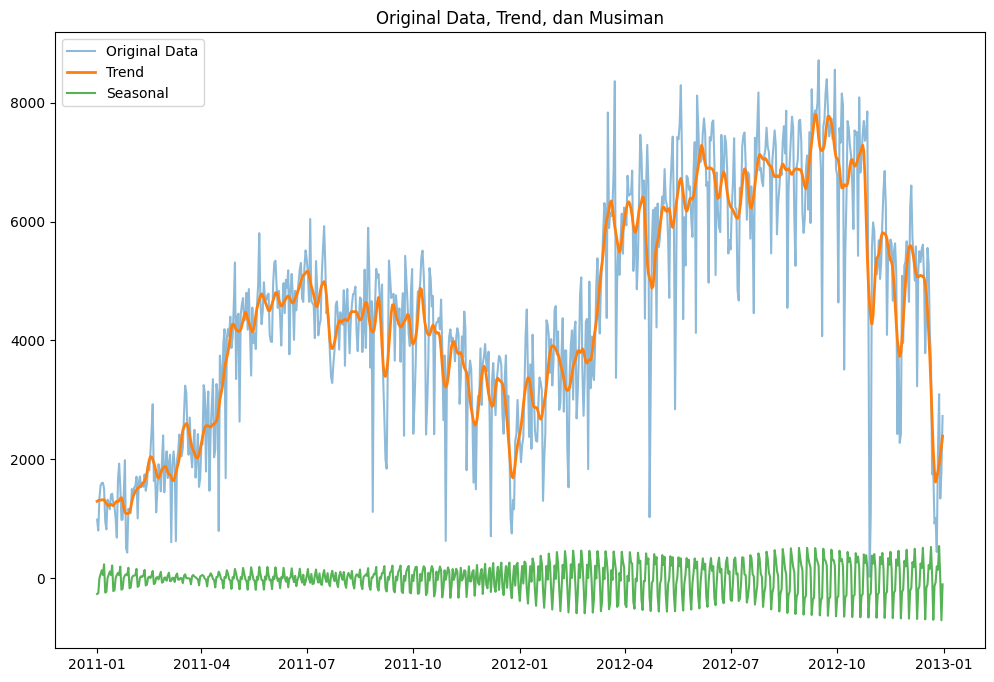

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(time_series_data, label='Original Data', alpha=0.5)
plt.plot(trend, label='Trend', linewidth=2)
plt.plot(seasonal, label='Seasonal', alpha=0.8)
plt.legend()
plt.title('Original Data, Trend, dan Musiman')
plt.show()

Visualisasi Residu STL

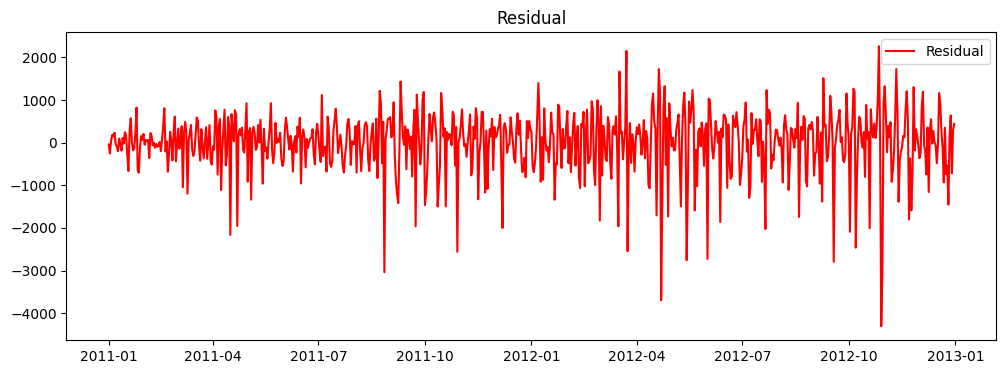

In [171]:
plt.figure(figsize=(12, 4))
plt.plot(residual, label='Residual', color='red')
plt.legend()
plt.title('Residual')
plt.show()

Dari hasil analisis deret waktu yang tepat kita dapat memahami dinamika permintaan pasar.

### Pertanyaan 2: Bagaimana performa lama sepeda disewa setiap bulannya pada setiap tahun?

Pada hasil Exploratory Data Analysis yang sudah dilakukan dapat dilihat lama sepeda disewa setiap bulannya pada setiap tahun. Untuk data ini, visualisasi data yang cocok adalah line chart. Sebelumnya untuk memudahkan penyampaian informasi, kategori tahun '0' dan '1' diganti terlebih dahulu begitu juga dengan kategori bulan.

In [172]:
year_name = {0: '2011', 1: '2012'}
hours_analysis['yr'] = hours_analysis['yr'].replace(year_name)
print(hours_analysis)

         yr  mnth  hr  cnt  total hours
0      2011     1   0   16            0
1      2011     1   1   40           40
2      2011     1   2   32           64
3      2011     1   3   13           39
4      2011     1   4    1            4
...     ...   ...  ..  ...          ...
17374  2012    12  19  119         2261
17375  2012    12  20   89         1780
17376  2012    12  21   90         1890
17377  2012    12  22   61         1342
17378  2012    12  23   49         1127

[17379 rows x 5 columns]


<ipython-input-172-be864150fc82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hours_analysis['yr'] = hours_analysis['yr'].replace(year_name)


In [173]:
month_name = {1: 'Jan', 2: 'Feb', 3: 'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
hours_analysis['mnth'] = hours_analysis['mnth'].replace(month_name)
print(hours_analysis)

         yr mnth  hr  cnt  total hours
0      2011  Jan   0   16            0
1      2011  Jan   1   40           40
2      2011  Jan   2   32           64
3      2011  Jan   3   13           39
4      2011  Jan   4    1            4
...     ...  ...  ..  ...          ...
17374  2012  Dec  19  119         2261
17375  2012  Dec  20   89         1780
17376  2012  Dec  21   90         1890
17377  2012  Dec  22   61         1342
17378  2012  Dec  23   49         1127

[17379 rows x 5 columns]


<ipython-input-173-c46df28ee5d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hours_analysis['mnth'] = hours_analysis['mnth'].replace(month_name)


Terdapat dua diagram, dimana setiap diagram mewakili satu tahunnya. DIlakukan filter untuk memisahkan tahun 2011 dan 2012

In [174]:
print(hours_analysis['yr'].value_counts())

2012    8734
2011    8645
Name: yr, dtype: int64


2011

In [175]:
filtered_hours_analysis1 = hours_analysis[hours_analysis['yr'] == '2011']
hours_analysis1 = filtered_hours_analysis1.groupby(['yr', 'mnth']).sum()
print(hours_analysis1)

               hr     cnt  total hours
yr   mnth                             
2011 April   8277   94870      1357117
     August  8412  136691      1957703
     Dec     8545   87323      1198907
     Feb     7649   48215       677933
     Jan     8168   38189       533692
     July    8556  141341      2029199
     June    8280  143512      2066434
     March   8506   64045       899059
     May     8556  135821      1943527
     Nov     8278  102167      1417585
     Oct     8553  123511      1745253
     Sept    8274  127418      1816303


Line Chart Lama sepeda disewa setiap bulannya pada tahun 2011

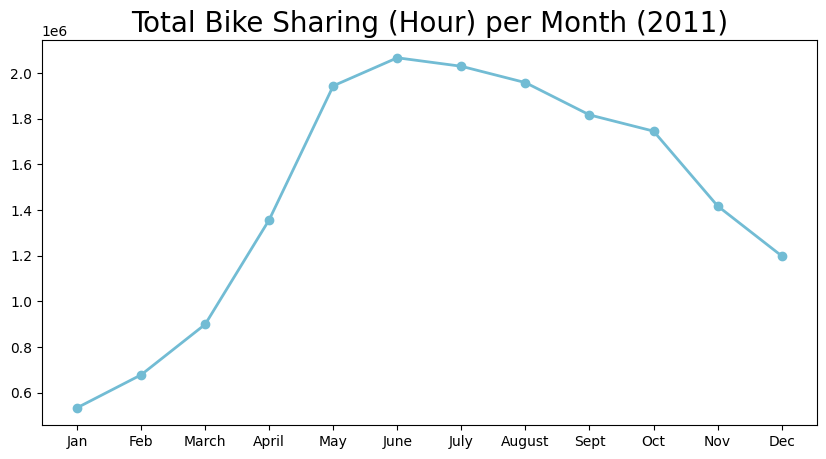

In [176]:
month_order = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec']

hours_analysis1.index = pd.Categorical(hours_analysis1.index.get_level_values('mnth'), categories=month_order, ordered=True)

hours_analysis1 = hours_analysis1.sort_index()

plt.figure(figsize=(10, 5))
plt.plot(
    hours_analysis1.index,
    hours_analysis1["total hours"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Bike Sharing (Hour) per Month (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

2012

In [177]:
filtered_hours_analysis2 = hours_analysis[hours_analysis['yr'] == '2012']
hours_analysis2 = filtered_hours_analysis2.groupby(['yr', 'mnth']).sum()
print(hours_analysis2)

               hr     cnt  total hours
yr   mnth                             
2012 April   8273  174224      2473708
     August  8556  214503      3067276
     Dec     8549  123713      1702766
     Feb     7990  103137      1438852
     Jan     8547   96744      1352011
     July    8556  203607      2910434
     June    8280  202830      2894688
     March   8554  164875      2342724
     May     8556  195865      2794022
     Nov     8274  152664      2108547
     Oct     8202  198841      2793786
     Sept    8280  218573      3087115


Line Chart Lama sepeda disewa setiap bulannya pada tahun 2012

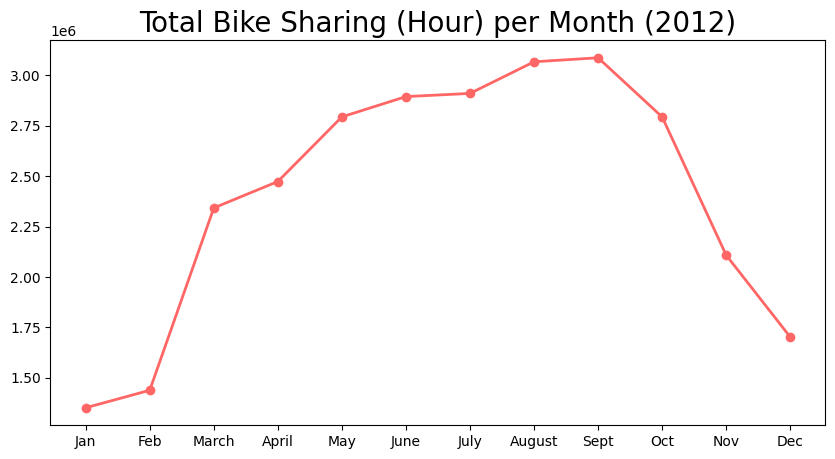

In [178]:
month_order = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec']

hours_analysis2.index = pd.Categorical(hours_analysis2.index.get_level_values('mnth'), categories=month_order, ordered=True)

hours_analysis2 = hours_analysis2.sort_index()

plt.figure(figsize=(10, 5))
plt.plot(
    hours_analysis2.index,
    hours_analysis2["total hours"],
    marker='o',
    linewidth=2,
    color="#FF6666"
)
plt.title("Total Bike Sharing (Hour) per Month (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Sekarang mari bandingkan kedua chart sekaligus untuk melihat perbedaannya.

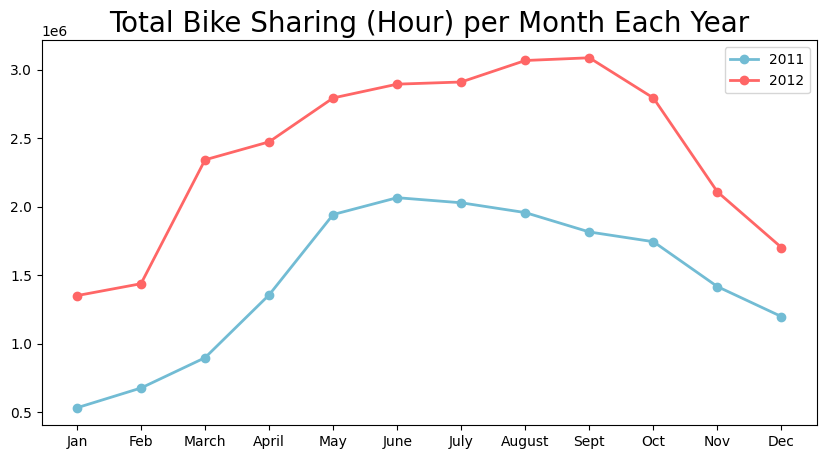

In [179]:
plt.figure(figsize=(10, 5))
plt.plot(
    hours_analysis1.index,
    hours_analysis1["total hours"],
    marker='o',
    linewidth=2,
    color="#72BCD4",
    label='2011'
)

plt.plot(
    hours_analysis2.index,
    hours_analysis2["total hours"],
    marker='o',
    linewidth=2,
    color="#FF6666",
    label='2012'
)

plt.title("Total Bike Sharing (Hour) per Month Each Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1: Berdasarkan hasil analisis dan graf sebelumnya kita dapat melihat bahwa season fall merupakan season dimana sepeda paling banyak disewa dan springer merupakan season dimana sepeda paling sedikit disewa.

- Conclution pertanyaan 2: Berdasarkan hasil analissis dan graf sebelumnya kita dapat melihat bahwa:

1.   Pada tahun 2011:
*   Bulan Januari menjadi bulan dengan lama sewa sepeda paling sedikit.
*   Terdapat peningkatan performa yang signifikan dari bulan March hingga May.

2.   Pada tahun 2012:
*   Bulan Januari menjadi bulan dengan lama sewa sepeda paling sedikit.
*   Terdapat peningkatan performa yang signifikan dari bulan Febuari hingga March.
*   Terdapat penurunan performa yang signifikan dari bulan September hingga December


3.   Terdapat peningkatan performa pada tahun 2012.




